## Data Exploration

In [104]:
import pandas as pd
import numpy as np
import missingno as msn
%matplotlib inline
import seaborn as sns
import matplotlib as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from plot_learning_curve import plot_learning_curve

In [ ]:
import sys

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('testSafe.csv')

In [4]:
df_train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [6]:
df_train.shape

(595212, 59)

In [9]:
df_train.isnull().any().any()

False

In [12]:
train_nan = df_train.replace(-1, np.NaN)

In [13]:
train_nan.isnull().any()

id                False
target            False
ps_ind_01         False
ps_ind_02_cat      True
ps_ind_03         False
ps_ind_04_cat      True
ps_ind_05_cat      True
ps_ind_06_bin     False
ps_ind_07_bin     False
ps_ind_08_bin     False
ps_ind_09_bin     False
ps_ind_10_bin     False
ps_ind_11_bin     False
ps_ind_12_bin     False
ps_ind_13_bin     False
ps_ind_14         False
ps_ind_15         False
ps_ind_16_bin     False
ps_ind_17_bin     False
ps_ind_18_bin     False
ps_reg_01         False
ps_reg_02         False
ps_reg_03          True
ps_car_01_cat      True
ps_car_02_cat      True
ps_car_03_cat      True
ps_car_04_cat     False
ps_car_05_cat      True
ps_car_06_cat     False
ps_car_07_cat      True
ps_car_08_cat     False
ps_car_09_cat      True
ps_car_10_cat     False
ps_car_11_cat     False
ps_car_11          True
ps_car_12          True
ps_car_13         False
ps_car_14          True
ps_car_15         False
ps_calc_01        False
ps_calc_02        False
ps_calc_03      

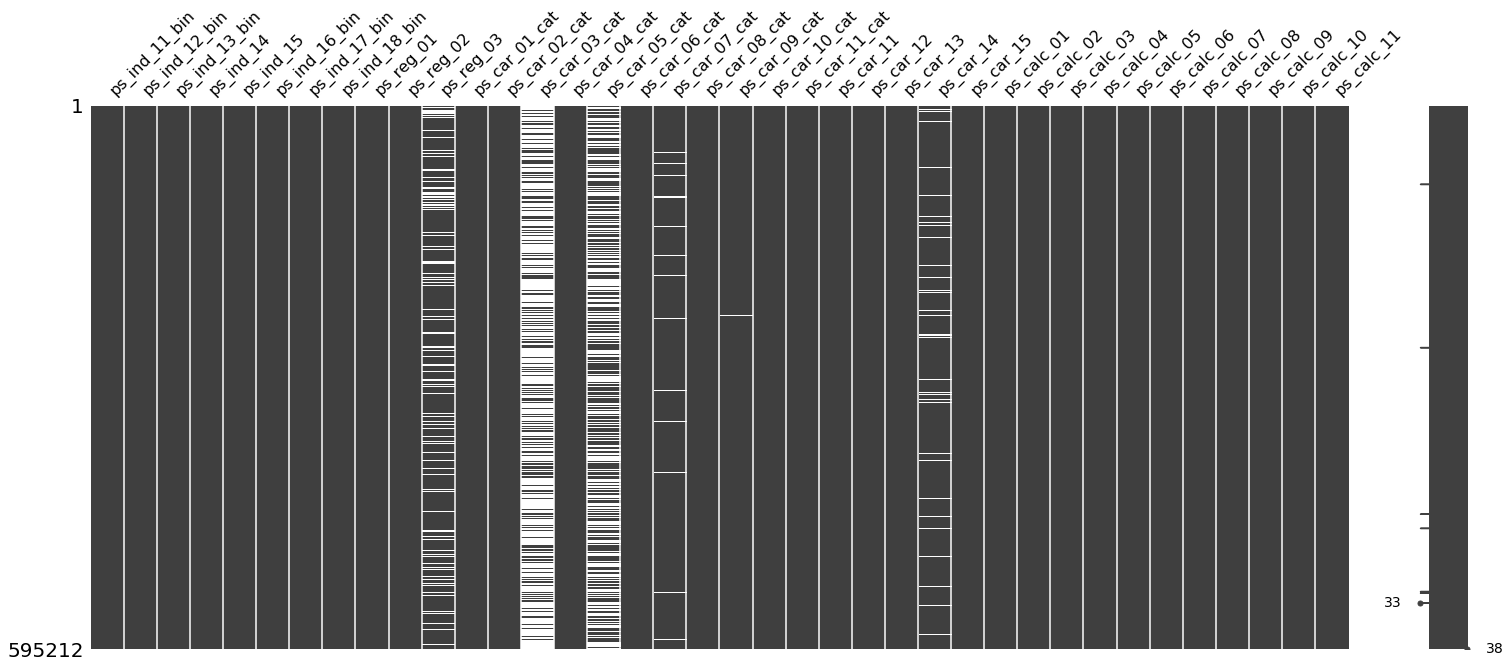

In [35]:
import missingno as msn
# Nullity or missing values by columns
msn.matrix(df=train_nan.iloc[:,12:50])


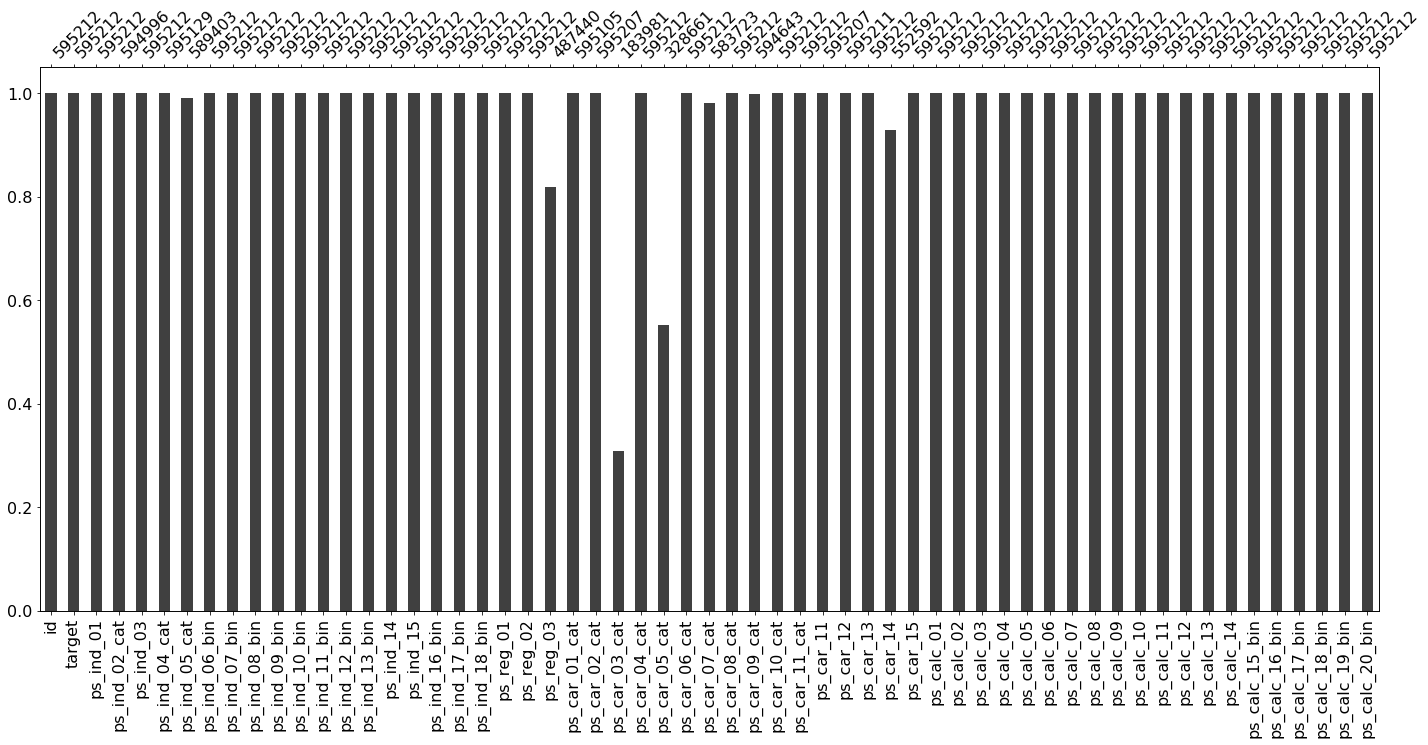

In [30]:
msn.bar(df=train_nan)

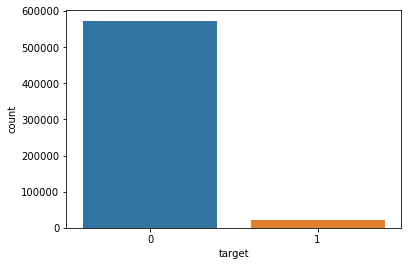

In [37]:
sns.countplot(df_train.target)

In [47]:
df_train.dtypes

id                  int64
target              int64
ps_ind_01           int64
ps_ind_02_cat       int64
ps_ind_03           int64
ps_ind_04_cat       int64
ps_ind_05_cat       int64
ps_ind_06_bin       int64
ps_ind_07_bin       int64
ps_ind_08_bin       int64
ps_ind_09_bin       int64
ps_ind_10_bin       int64
ps_ind_11_bin       int64
ps_ind_12_bin       int64
ps_ind_13_bin       int64
ps_ind_14           int64
ps_ind_15           int64
ps_ind_16_bin       int64
ps_ind_17_bin       int64
ps_ind_18_bin       int64
ps_reg_01         float64
ps_reg_02         float64
ps_reg_03         float64
ps_car_01_cat       int64
ps_car_02_cat       int64
ps_car_03_cat       int64
ps_car_04_cat       int64
ps_car_05_cat       int64
ps_car_06_cat       int64
ps_car_07_cat       int64
ps_car_08_cat       int64
ps_car_09_cat       int64
ps_car_10_cat       int64
ps_car_11_cat       int64
ps_car_11           int64
ps_car_12         float64
ps_car_13         float64
ps_car_14         float64
ps_car_15   

In [52]:
df_train_f = df_train.select_dtypes(include=['float64'])
df_train_i = df_train.select_dtypes(include=['int64'])

In [53]:
df_train_i.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


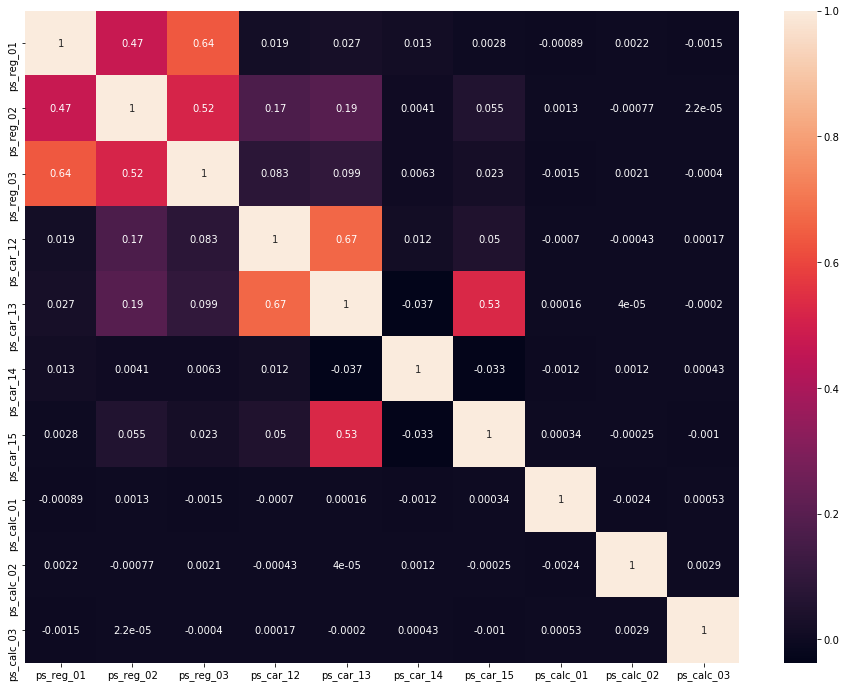

In [61]:
plt.pyplot.figure(figsize=(16,12))
sns.heatmap(df_train_f.corr(), annot=True)

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, max_depth=3, min_samples_leaf=4, max_features=0.5, random_state=0)
gb.fit(df_train.drop(['id', 'target'],axis=1), df_train.target)
features = df_train.drop(['id', 'target'],axis=1).columns.values
print("----- Training Done -----")

----- Training Done -----


In [63]:
features

array(['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02',
       'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat',
       'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat',
       'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat',
       'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15',
       'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08',
       'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12',
       'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin', 'ps_calc_16_bin',
       'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'], dtype=obj

In [71]:
gb.feature_importances_

array([ 0.04125251,  0.02305019,  0.11819831,  0.02801877,  0.05827916,
        0.01209536,  0.0160567 ,  0.01844496,  0.01366427,  0.00103192,
        0.00052358,  0.0054476 ,  0.        ,  0.00423914,  0.05467417,
        0.01405761,  0.03382896,  0.        ,  0.02950704,  0.02464461,
        0.05976459,  0.04938635,  0.        ,  0.02345223,  0.00956036,
        0.00108173,  0.01109547,  0.01899294,  0.00597323,  0.02588686,
        0.        ,  0.01216296,  0.02624959,  0.02312776,  0.13646127,
        0.02873591,  0.02210638,  0.00883408,  0.        ,  0.0041523 ,
        0.00014236,  0.00830896,  0.00386102,  0.006822  ,  0.        ,
        0.0015952 ,  0.00251808,  0.00379446,  0.00618947,  0.        ,
        0.00272958,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ])

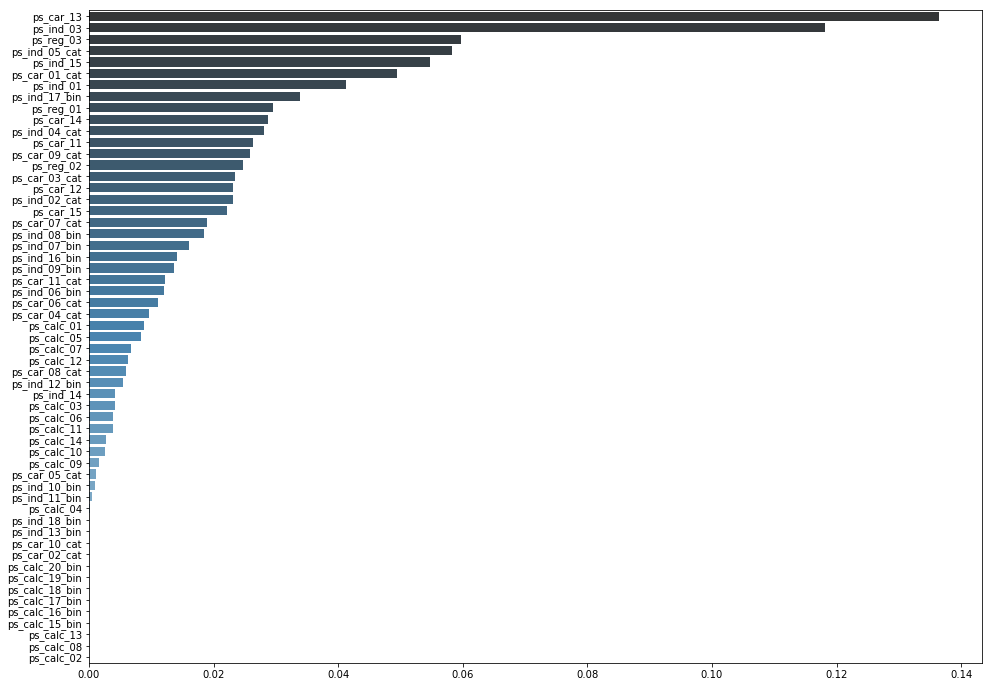

In [95]:
x, y = (list(x) for x in zip(*sorted(zip(gb.feature_importances_, features), 
                                                            reverse = True)))
plt.pyplot.figure(figsize=(16,12))
sns.barplot(x = x, y = y, palette='Blues_d')

In [78]:

x, y = (list(x) for x in zip(*sorted(zip(gb.feature_importances_, features), 
                                                            reverse = True)))

In [90]:
for i in zip(*sorted(zip(gb.feature_importances_, features))):
        print(list(i))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00014236190338936391, 0.00052358142793418458, 0.0010319188704828058, 0.0010817274896845141, 0.0015951991080588477, 0.0025180755304173006, 0.0027295826567797893, 0.0037944553573762895, 0.0038610195926915636, 0.0041523032558408281, 0.0042391424051564661, 0.0054475991584980931, 0.0059732268423030787, 0.0061894674951333915, 0.0068219978630808609, 0.0083089594059201303, 0.0088340828516751489, 0.0095603646036559586, 0.011095473902423389, 0.012095355744114602, 0.012162958442593876, 0.013664273033414357, 0.014057609717518373, 0.016056703997596396, 0.018444957563161783, 0.018992935862578705, 0.022106381848714309, 0.023050194084286959, 0.023127761623952994, 0.023452228830199835, 0.024644607034715313, 0.025886855313344337, 0.026249593157220238, 0.028018770786878703, 0.02873590890859215, 0.029507044304237021, 0.033828962608616099, 0.041252510354949423, 0.049386350607976158, 0.054674174075082502, 0.058279159307432812, 0.05976458761

In [101]:
X = df_train.drop(['id', 'target'], axis = 1)
y = df_train.target
x_train, x_test, y_train, y_test = train_test_split(X, y,train_size = 0.2, random_state = 4)

/Users/navdeeppal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [99]:
roc_auc_score(gb.predict(df_train.drop(['id', 'target'], axis = 1)), df_train.target)

0.8611041796649388

In [103]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

<module 'matplotlib.pyplot' from '/Users/navdeeppal/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/pyplot.py'>

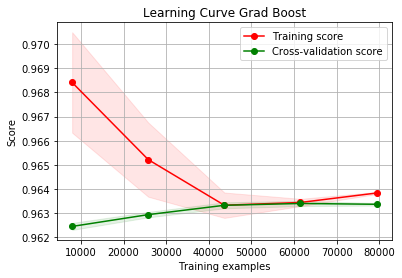

In [106]:
plot_learning_curve(gb, 'Learning Curve Grad Boost', x_train, y_train, n_jobs=3)

In [ ]:
from sklearn.metrics import make_scorer
def gini(truth, predictions):
    g = np.asarray(np.c_[truth, predictions, np.arange(len(truth)) ], dtype=np.float)
    g = g[np.lexsort((g[:,2], -1*g[:,1]))]
    gs = g[:,0].cumsum().sum() / g[:,0].sum()
    gs -= (len(truth) + 1) / 2.
    return gs / len(truth)

def gini_xgb(predictions, truth):
    truth = truth.get_label()
    return 'gini', -1.0 * gini(truth, predictions) / gini(truth, truth)

def gini_lgb(truth, predictions):
    score = gini(truth, predictions) / gini(truth, truth)
    return 'gini', score, True

def gini_sklearn(truth, predictions):
    return gini(truth, predictions) / gini(truth, truth)

gini_scorer = make_scorer(gini_sklearn, greater_is_better=True, needs_proba=True)

In [ ]:
params = { 'n_estimators' : [50, 100, 1000],
          'max_depth' : [3, 10, 20],
          'min_samples_leaf' : [1,10,20]
    }
cv_gb = GridSearchCV(gb, params, n_jobs=3, scoring = gini_scorer, verbose = 1)
cv_gb.fit(x_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [ ]:
n_estimators=100, max_depth=3, min_samples_leaf=4, max_features=0.5